In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def frame_on_marker(frame, image_with_marker, final_width_multiplier, final_height_multiplier):
    #Obtain Frame and Marker Points in int format
    frame_corners = grab_corners(frame)
    marker_corners = detect_markers(image_with_marker)
    marker_corners = resize_corners(marker_corners,final_width_multiplier, final_height_multiplier).astype(int)
    
    #Obtain Trasnsformation Matrix
    transformation_matrix = cv2.getPerspectiveTransform(frame_corners.astype(np.float32),marker_corners.astype(np.float32))
    
    #Warp the frame on markers
    warped_image = cv2.warpPerspective(frame,transformation_matrix,dsize= (image_with_marker.shape[1],image_with_marker.shape[0]))
    
    #Create Mask and fill marker corners with black
    mask = np.zeros_like(image_with_marker)
    mask = cv2.fillPoly(mask,marker_corners,(255,255,255))
    mask = cv2.bitwise_not(mask)
    
    #Insert black void in original image
    image_with_void = cv2.bitwise_and(mask,image_with_marker)
    
    #Fill the void with frame
    frame_on_marker = cv2.bitwise_or(image_with_void,warped_image)
    
    return (frame_on_marker)

In [3]:
def read_image(image):
    return cv2.imread(image)

def show_image(image):
    cv2.namedWindow('image',cv2.WINDOW_KEEPRATIO)
    cv2.imshow('image',image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [4]:
def detect_show_markers(image):
    '''Returns an image with highlighted corners and marker corner co-ordinates'''
   # image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    #Loading the dictionary that was used to generate the markers. Marker used in this task contains a 6X6 matrix. 
    dictionary = cv2.aruco.Dictionary_get(cv2.aruco.DICT_6X6_1000)
 
    # Initializing the detector parameters using default values
    parameters =  cv2.aruco.DetectorParameters_create()
 
    # Detecting the marker in the image by obtaining its corners
    marker_corners, markerid, rejectedCandidates = cv2.aruco.detectMarkers(image, dictionary1, parameters=parameters)
    
    return cv2.polylines(image,[marker_corners[0].astype(int)],isClosed=True,color= (0,255,0),thickness=5), marker_corners[0].astype(int)


In [5]:
def detect_markers(image):
    '''Returns an image with highlighted corners and marker corner co-ordinates'''
   # image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    #Loading the dictionary that was used to generate the markers. Marker used in this task contains a 6X6 matrix. 
    dictionary = cv2.aruco.Dictionary_get(cv2.aruco.DICT_6X6_1000)
 
    # Initializing the detector parameters using default values
    parameters =  cv2.aruco.DetectorParameters_create()
 
    # Detecting the marker in the image by obtaining its corners
    marker_corners, markerid, rejectedCandidates = cv2.aruco.detectMarkers(image, dictionary, parameters=parameters)
    
    return marker_corners[0][0].astype(int)


In [6]:
def edge_angle_finder(corners):
    
    bottom_width = abs(corners[2,0] - corners[3,0])
    bottom_height = abs(corners[2,1] - corners[3,1])
    bottom_angle = (math.atan(bottom_height/bottom_width))*(180/math.pi)
    top_width = abs(corners[0,0] - corners[1,0])
    top_height = abs(corners[0,1] - corners[1,1])
    top_angle = (math.atan(top_height/top_width))*(180/math.pi)
    print(f"top_angle = {top_angle}, bottom_angle = {bottom_angle}")



def grab_corners(image):
    points = np.array([
                      [0,0],
                      [(image.shape[1])-1,0],
                      [(image.shape[1])-1,(image.shape[0])-1],
                      [0,(image.shape[0])-1]
                      ])
    return points

In [7]:
def resize_image(image, final_width_multiplier, final_height_multiplier):
    fwm = final_width_multiplier
    fhm = final_height_multiplier
    image_corners = grab_corners(image)
    #Resize x coordinates
    x1 = image_corners[0,0]
    x2 = image_corners[1,0]
    x3 = image_corners[2,0]
    x4 = image_corners[3,0]
    
    w = abs(x2-x1)
    
    x1 = x1-(w*((fwm-1)/2))
    x2 = x2+(w*((fwm-1)/2))
    x3 = x3+(w*((fwm-1)/2))
    x4 = x4-(w*((fwm-1)/2))
    
    
    #Resize y coordinates
    y1 = image_corners[0,1]
    y2 = image_corners[1,1]
    y3 = image_corners[2,1]
    y4 = image_corners[3,1]
    
    h = abs(y1-y2)
    
    y1 = y1-(h*((h-1)/2))
    y2 = y2-(h*((h-1)/2))
    y3 = y3+(h*((h-1)/2))
    y4 = y4+(h*((h-1)/2))
    
    resized_image_corners = np.array([[x1,y1],
                                      [x2,y2],
                                      [x3,y3],
                                      [x4,y4]])
    return resized_image_corners
    

In [8]:
def frame_on_marker(frame, image_with_marker, final_width_multiplier, final_height_multiplier):
    #Obtain Frame and Marker Points in int format
    frame_corners = grab_corners(frame)
    marker_corners = detect_markers(image_with_marker)
    
    #Obtain Trasnsformation Matrix
    transformation_matrix = cv2.getPerspectiveTransform(frame_corners.astype(np.float32),marker_corners.astype(np.float32))
    
    #Warp the frame on markers
    warped_image = cv2.warpPerspective(frame,transformation_matrix,dsize= (image_with_marker.shape[1],image_with_marker.shape[0]))
    
    #Create Mask and fill marker corners with black
    mask = np.zeros_like(image_with_marker)
    mask = cv2.fillPoly(mask,marker_corners,(255,255,255))
    mask = cv2.bitwise_not(mask)
    
    #Insert black void in original image
    image_with_void = cv2.bitwise_and(mask,image_with_marker)
    
    #Fill the void with frame
    frame_on_marker = cv2.bitwise_or(image_with_void,warped_image)
    
    show_image(frame_on_marker)

In [9]:
def resize_corners(image_corners, final_width_multiplier, final_height_multiplier):
    fwm = final_width_multiplier
    fhm = final_height_multiplier
    
    #Resize x coordinates
    x1 = image_corners[0,0]
    x2 = image_corners[1,0]
    x3 = image_corners[2,0]
    x4 = image_corners[3,0]
    
    w = abs(x2-x1)
    
    x1 = x1-(w*((fwm-1)/2))
    x2 = x2+(w*((fwm-1)/2))
    x3 = x3+(w*((fwm-1)/2))
    x4 = x4-(w*((fwm-1)/2))
    
    
    #Resize y coordinates
    y1 = image_corners[0,1]
    y2 = image_corners[1,1]
    y3 = image_corners[2,1]
    y4 = image_corners[3,1]
    
    h = abs(y2-y3)
    
    y1 = y1-(h*((fhm-1)/2))
    y2 = y2-(h*((fhm-1)/2))
    y3 = y3+(h*((fhm-1)/2))
    y4 = y4+(h*((fhm-1)/2))
    
    resized_image_corners = np.array([[x1,y1],
                                      [x2,y2],
                                      [x3,y3],
                                      [x4,y4]])
    return resized_image_corners
    

In [11]:
car = read_image('Aston-Martin-Vantage-AMR-Vettel-169FullWidth-c058824f-1722366.jpg')
classroom = read_image("Angle  (6).jpg")

In [12]:
car_final1 = frame_on_marker(car,classroom,5,5)
cv2.imwrite('car_final_1.png',car_final1)

error: OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-k1ohfcms\opencv\modules\imgproc\src\drawing.cpp:2395: error: (-215:Assertion failed) p.checkVector(2, CV_32S) >= 0 in function 'cv::fillPoly'


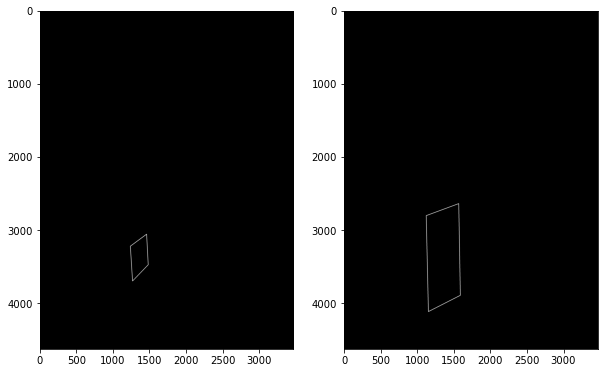

In [13]:
qr_code_markers = detect_markers(read_image('Angle  (9).jpg'))
fig, axes = plt.subplots(1,2,figsize=(10,20))
blank = np.zeros_like(read_image("Angle  (1).jpg"))
blank1 = cv2.polylines(blank, [qr_code_markers],isClosed = True,color = (255,255,255),thickness =5)
blank = np.zeros_like(read_image("Angle  (1).jpg"))

blank2 = cv2.polylines(blank,[resize_corners(qr_code_markers,2,3).astype(int)],isClosed = True,color=(255,255,255),thickness=5)

axes[0].imshow(blank1)
axes[1].imshow(blank2)

In [ ]:
resize_corners(qr_code_markers,3,3)

In [12]:
angle1_m = detect_markers(read_image('Angle  (1).jpg'))

In [13]:
np.median(detect_markers(read_image('Angle  (1).jpg')),0).astype(int)

array([1709, 1971])

In [15]:
car = read_image('Aston-Martin-Vantage-AMR-Vettel-169FullWidth-c058824f-1722366.jpg')
image_with_marker = read_image("Angle  (1).jpg")

In [21]:
np.median(grab_corners(read_image('Aston-Martin-Vantage-AMR-Vettel-169FullWidth-c058824f-1722366.jpg')),0).astype(int)

array([549, 309])

In [22]:
read_image('Aston-Martin-Vantage-AMR-Vettel-169FullWidth-c058824f-1722366.jpg').shape

(619, 1100, 3)

In [16]:
car_new_points = np.array([[496,256],
                           [603,256],
                           [603,363],
                           [496,363]])
 #Obtain Trasnsformation Matrix
transformation_matrix = cv2.getPerspectiveTransform(car_new_points.astype(np.float32),angle1_m.astype(np.float32))
    
    #Warp the frame on markers
warped_image = cv2.warpPerspective(car,transformation_matrix,dsize= (image_with_marker.shape[1],image_with_marker.shape[0]))

show_image(cv2.bitwise_or(warped_image,read_image('Angle  (1).jpg')))
    

In [35]:
detect_markers(read_image('Angle  (3).jpg')).astype(int)

array([[1905, 2029],
       [1995, 2024],
       [1999, 2182],
       [1910, 2193]])

In [28]:
car_new_points = np.array([[504,227],
                           [594,227],
                           [594,391],
                           [504,391]])
angle3i = read_image('Angle  (3).jpg')
angle3m = detect_markers(angle3i)
transformation_matrix = cv2.getPerspectiveTransform(car_new_points.astype(np.float32),angle3m.astype(np.float32))
    
    #Warp the frame on markers
warped_image = cv2.warpPerspective(car,transformation_matrix,dsize= (angle3i.shape[1],angle3i.shape[0]))
show_image(warped_image)
#cv2.imwrite('new_warped_technique.png',warped_image)

In [19]:
classroom = read_image('Angle  (3).jpg')
car_warped = read_image('new_warped_technique.png')
classroom.shape
warped_bw = cv2.cvtColor(car_warped,cv2.COLOR_BGR2GRAY)
white_mask = np.zeros_like(classroom)
white_mask = cv2.bitwise_not(white_mask)

In [20]:
for i in range(warped_bw.shape[0]):
    for j in range(warped_bw.shape[1]):
        if warped_bw[i,j] == 0:
            white_mask[i,j] = 0

In [21]:
mask = cv2.bitwise_not(white_mask)
show_image(mask)
#mask = cv2.bitwise_and(mask,classroom)

In [18]:
#show_image(mask)
show_image(cv2.bitwise_or(mask,car_warped))
cv2.imwrite('car_warped_masked.png',(cv2.bitwise_or(mask,car_warped)))

True

# Akshays Method

In [33]:
elons_middle_points = np.array([[230,217.45],
                                [270,217.45],
                                [270,282.55],
                                [230,282.55]])
elon = read_image('elon.png')
classroom8i = read_image('Angle  (8).jpg')
classroom8m = detect_markers(classroom8i)
transformation_matrix1 = cv2.getPerspectiveTransform(elons_middle_points.astype(np.float32),classroom8m.astype(np.float32))
    
elon_warped_image = cv2.warpPerspective(elon,transformation_matrix,dsize= (classroom8i.shape[1],classroom8i.shape[0]))
show_image(elon_warped_image)
elon_mask = np.zeros_like(classroom8i)
elon_warped_points = np.array([[1847.5,3007],
                               [3912,3007],
                               [3912,3243],
                               [1847.5,3243]])

In [25]:
def frame_on_marker(frame, image_with_marker, final_width_multiplier, final_height_multiplier):
    #Obtain Frame and Marker Points in int format
    frame_corners = grab_corners(frame)
    marker_corners = detect_markers(image_with_marker)
    marker_corners = resize_corners(marker_corners,final_width_multiplier, final_height_multiplier).astype(int)
    
    #Obtain Trasnsformation Matrix
    transformation_matrix = cv2.getPerspectiveTransform(frame_corners.astype(np.float32),marker_corners.astype(np.float32))
    
    #Warp the frame on markers
    warped_image = cv2.warpPerspective(frame,transformation_matrix,dsize= (image_with_marker.shape[1],image_with_marker.shape[0]))
    
    #Create Mask and fill marker corners with black
    mask = np.zeros_like(image_with_marker)
    mask = cv2.fillPoly(mask,[marker_corners],(255,255,255))
    mask = cv2.bitwise_not(mask)
    
    #Insert black void in original image
    image_with_void = cv2.bitwise_and(mask,image_with_marker)
    
    #Fill the void with frame
    frame_on_marker = cv2.bitwise_or(image_with_void,warped_image)
    
    return (frame_on_marker)
show_image(frame_on_marker(car,classroom,5,5))

image1, corners1 = detect_markers(read_image('Angle  (1).jpg'))
image2, corners1 = detect_markers(read_image('Angle  (2).jpg'))
image3, corners1 = detect_markers(read_image('Angle  (3).jpg'))
image4, corners1 = detect_markers(read_image('Angle  (4).jpg'))
image5, corners1 = detect_markers(read_image('Angle  (5).jpg'))
image6, corners1 = detect_markers(read_image('Angle  (6).jpg'))
#image7, corners1 = detect_markers(read_image('Angle  (7).jpg'))
image8, corners1 = detect_markers(read_image('Angle  (8).jpg'))
image9, corners1 = detect_markers(read_image('Angle  (9).jpg'))
image10, corners1 = detect_markers(read_image('Angle  (10).jpg'))
#image11, corners1 = detect_markers(read_image('Angle  (11).jpg'))

cv2.imwrite('Angle1_H.png',image1)
cv2.imwrite('Angle2_H.png',image2)
cv2.imwrite('Angle3_H.png',image3)
cv2.imwrite('Angle4_H.png',image4)
cv2.imwrite('Angle5_H.png',image5)
cv2.imwrite('Angle6_H.png',image6)
cv2.imwrite('Angle8_H.png',image8)
cv2.imwrite('Angle9_H.png',image9)
cv2.imwrite('Angle10_H.png',image1)